In [12]:
import sys
import os

# Go up one level to 'cross_sectioner' root
project_root = os.path.abspath(os.path.join('..'))

if project_root not in sys.path:
    sys.path.append(project_root)

# Now you can import from the 'drawer' folder
from drawer import draw_functions as dfun

# To this:
print(f"Successfully imported from: {dfun.__file__}")

Successfully imported from: /home/medvedku/projects/FEA/cross_sectioner/drawer/draw_functions.py


Loaded Profile: L80x50x6
--- Full Fillet Comparison ---
Database Area:      755.00 mm²
Shapely Area:       754.68 mm²
Difference:         0.0428 %


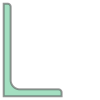

In [13]:
import sqlite3
import pandas as pd
import os

# Use the project_root we defined earlier
# If you didn't keep the variable, use: project_root = os.path.abspath('..')

db_path = os.path.join(project_root, 'scaper', 'steel_engineering_final.db')

# 1. Setup Connection
conn = sqlite3.connect(db_path)

# 2. Fetch the specific IPN profile
query = "SELECT * FROM sections_lu ORDER BY RANDOM() LIMIT 1"
random_profile = pd.read_sql(query, conn).iloc[0].to_dict()
conn.close()

# 2. Create the full geometry
angle_geom = dfun.create_angle_geometry(
    h=float(random_profile['h']),
    b=float(random_profile['b']),
    t=float(random_profile['t']),
    r_root=float(random_profile['r_root']),
    r_toe=float(random_profile['r_toe'])
)

# 3. Final Area Validation
db_area = random_profile['A']
calc_area = angle_geom.area
diff = abs(calc_area - db_area) / db_area * 100

print(f"Loaded Profile: {random_profile['Section_ID']}")
print(f"--- Full Fillet Comparison ---")
print(f"Database Area:  {db_area:>10.2f} mm²")
print(f"Shapely Area:   {calc_area:>10.2f} mm²")
print(f"Difference:     {diff:>10.4f} %")

# The "little preview"
angle_geom

In [14]:
# Using defaults
dfun.save_geometry_to_svg(
    angle_geom, filename=f"{random_profile['Section_ID']}.svg")

# Custom filename and color, keeping the inversion
dfun.save_geometry_to_svg(
    angle_geom, filename=f"{random_profile['Section_ID']}_2.svg", color="#ff5733")

# If you already handled inversion elsewhere
dfun.save_geometry_to_svg(angle_geom, 
                          filename=f"{random_profile['Section_ID']}_3.svg",
                          invert_y=False, 
                          color="#d633ff", 
                          folder=os.path.join(project_root, "Sections"))

Saved: ./L80x50x6.svg (50.00mm x 80.00mm)
Saved: ./L80x50x6_2.svg (50.00mm x 80.00mm)
Saved: /home/medvedku/projects/FEA/cross_sectioner/Sections/L80x50x6_3.svg (50.00mm x 80.00mm)
